##  Convolve Op (WIP: mostly incomplete) 

In [2]:
//load ImageJ
%classpath config resolver imagej.public https://maven.imagej.net/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: imagej.public


net.imagej.ImageJ@485ff62e

This `Op` convolves an image with a provided kernel (see [Wikipedia](https://en.wikipedia.org/wiki/Kernel_(image_processing)#Convolution)). Let's see how the `Op` is called:

In [3]:
ij.op().help("convolve")

Available operations:
	(RandomAccessibleInterval out) =
	net.imagej.ops.filter.convolve.ConvolveNaiveF(
		RandomAccessibleInterval in1,
		RandomAccessibleInterval in2,
		OutOfBoundsFactory obf?,
		Type outType?)
	(RandomAccessibleInterval out) =
	net.imagej.ops.filter.convolve.ConvolveFFTF(
		RandomAccessibleInterval in1,
		RandomAccessibleInterval in2,
		long[] borderSize?,
		OutOfBoundsFactory obfInput?,
		OutOfBoundsFactory obfKernel?,
		Type outType?,
		ComplexType fftType?)
	(RandomAccessibleInterval out) =
	net.imagej.ops.filter.convolve.ConvolveNaiveC(
		RandomAccessibleInterval out,
		RandomAccessible in,
		RandomAccessibleInterval kernel)
	(RandomAccessibleInterval out) =
	net.imagej.ops.filter.convolve.ConvolveFFTC(
		RandomAccessibleInterval out,
		RandomAccessibleInterval in1,
		RandomAccessibleInterval in2,
		RandomAccessibleInterval fftInput,
		RandomAccessibleInterval fftKernel,
		boolean performInputFFT?,
		boolean performKernelFFT?)

You will note that there are a lot of different options. Let's start with the simplest option, `ConvolveNaiveC`. This `Op` takes an image input, a kernel to convolve on the image, and an **optional** preallocated output.

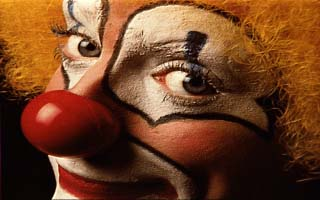

In [10]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/clown.png")

ij.notebook().display(input)

Let's set up a fast, rudimentary (though very susceptible to noise) edge detection algorithm (kernel 

In [35]:
import net.imglib2.img.array.ArrayImgs

//we are setting up a 3x3x3 kernel, so
kernel = [0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, 8, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0] as float[]
kernel_img = ArrayImgs.floats(kernel, 3, 3, 3)

ij.notebook().display(kernel_img)

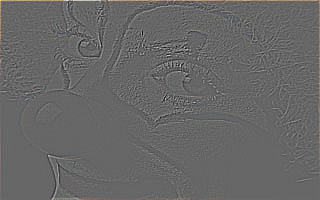

In [36]:
convolveOP = ij.op().filter().convolve(input, kernel_img)

ij.notebook().display(input_convolved)